# Loanword analysis using Markov language model  
### with Kneser Ney smoothing 
### Files from WOLD  - forms, segmented forms, indicator of loan words  
## Requires NLTK3.5  

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Do this once in the kernel.
import sys
sys.path.append('code')

# Set to automatically reload.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# List of study languages:
languages = ['English', 'Hup', 'ImbaburaQuechua', 'Mapudungun', 'Qeqchi', 'Wichi']
# English for development and the Latin American languages for strong regioinal interest.

In [18]:
# Compile code for MarkovCharLM...
import py_compile
py_compile.compile('code/utility_functions.py')
py_compile.compile('code/markov_char_lm.py')
py_compile.compile('code/markov_model_analysis.py')

'code/__pycache__/markov_model_analysis.cpython-38.pyc'

In [19]:
from utility_functions import *
from markov_char_lm import MarkovCharLM
from markov_model_analysis import analyze_language_word_distributions
from markov_model_analysis import analyze_language_word_distributions_native_basis
from markov_model_analysis import language_word_discrimination_dual_basis
from markov_model_analysis import language_word_discrimination_native_basis
from markov_model_analysis import language_word_discrimination_dual_basis
from markov_model_analysis import language_word_discrimination_native_basis
from markov_model_analysis import k_fold_language_word_discrimination_native_basis
from markov_model_analysis import k_fold_language_word_discrimination_dual_basis
from markov_model_analysis import k_fold_entropy_for_language

# Randomization test for distribution differences  
## Markov model entropies calculated from undifferentiated (entire) word table  
1. Fit Markov model to undifferentiated sample or entire table.  
2. Examine distributiona of native and loan words.  
3. Randomization test for native versus loan word distributional differences.
    1. Calculate decision statistic for 'true' vector of native versus loan.  
    2. Perform n randomizations of vector which arbitrarily designates native versus loan.
        1. calculate statistic for each randomization.
    3. Determine empirical probability distribution of statistic and probability of original decision statistic.  
        

Language=English, form=formchars


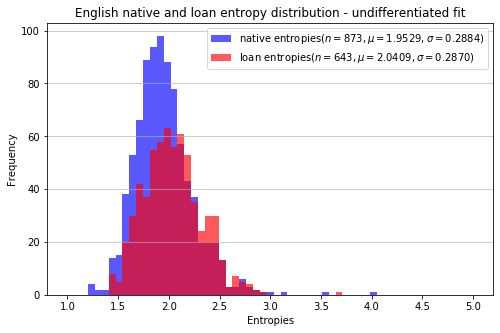

prob (ks stat >= 0.16808) = 0.00495


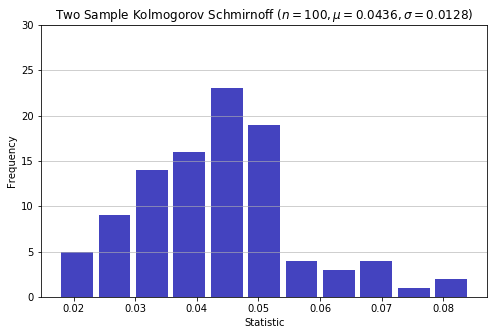

Language=English, form=segments


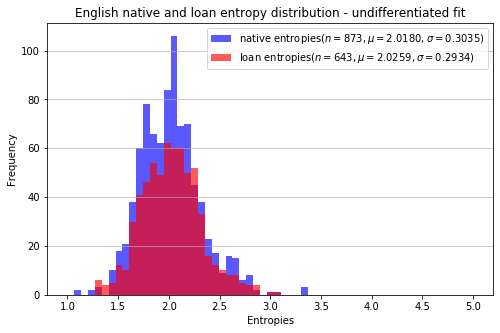

prob (ks stat >= 0.04214) = 0.55941


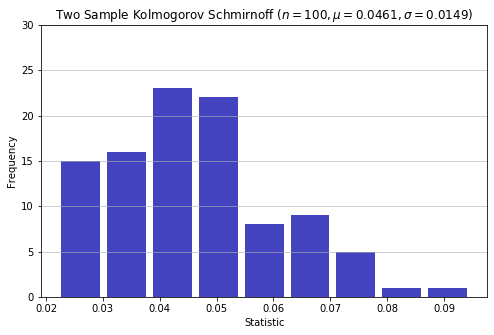

Language=English, form=scas


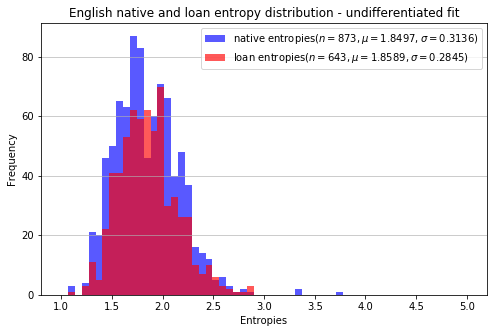

prob (ks stat >= 0.05185) = 0.18317


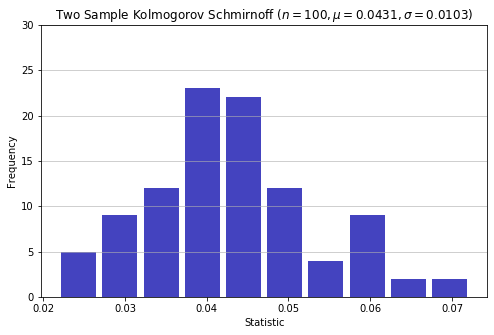

In [20]:
# Test
analyze_language_word_distributions('English', form='formchars', test='ks', n=100)
analyze_language_word_distributions('English', form='segments', test='ks', n=100)
analyze_language_word_distributions('English', form='scas', test='ks', n=100)

# Testing on both original forms, segmented by character, and curated segmentation with IPA symbols.
# Only used 100 replicates in randomization for testing. Practical would be 5000.

# Randomization tests for distribution differences  
## Constructs native and loan Markov models for each randomization  
- Repeated estimation of model and with random selector - very compute intensive
    - Correct approach in that it incoporates the learning bias.
    - Reduced repetitions to 1000 due to compute time.  

Language=English, form=formchars


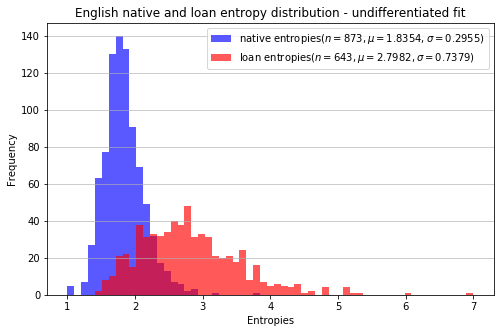

prob (stat >= 0.6870465084378602 ) = 0.004950495049504955


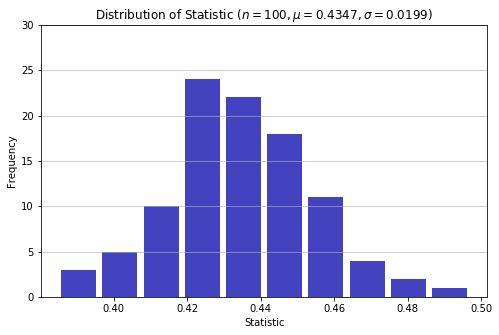

Language=English, form=segments


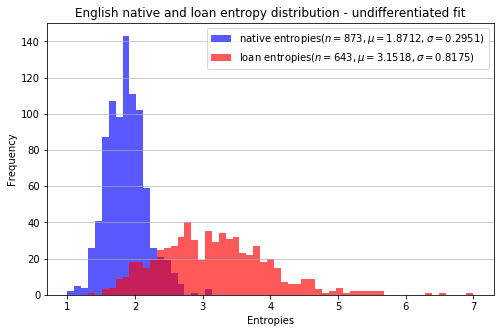

prob (stat >= 0.7809184824143699 ) = 0.004950495049504955


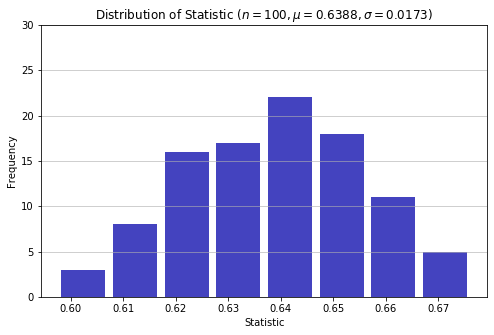

Language=English, form=scas


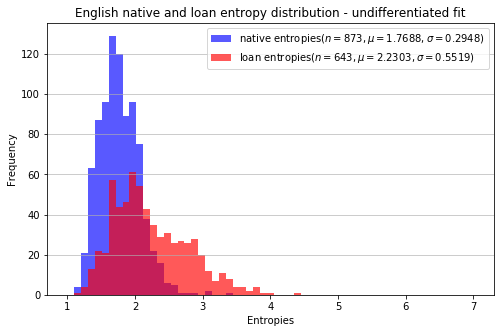

prob (stat >= 0.4050778584776757 ) = 0.004950495049504955


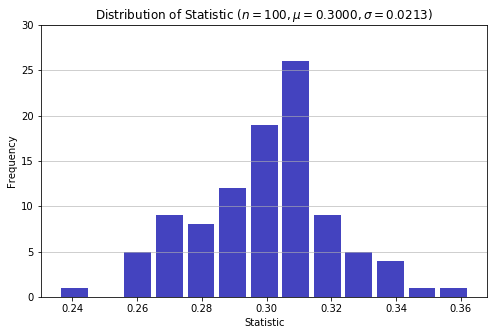

In [9]:
#Test
analyze_language_word_distributions_native_basis('English', test='ks', n=100)
analyze_language_word_distributions_native_basis('English', form='segments', test='ks', n=100)
analyze_language_word_distributions_native_basis('English', form='scas', test='ks', n=100)

# Testing on both original forms, segmented by character, and curated segmentation with IPA symbols.
# Only used 100 replicates in randomization for testing. Practical would be 1000, and still costly in time.

# Word discrimination - based on native versus loan entropy models

In [21]:
#Test
language_word_discrimination_dual_basis("English", smoothing=0.5)
language_word_discrimination_dual_basis("English", form='segments', smoothing=0.5)
language_word_discrimination_dual_basis("English", form='scas', smoothing=0.5)


Language=English, form=formchars
num train= 1213, num test=  303

* TRAIN RESULTS *
precision, recall, F1 = (0.9479606188466948, 0.9533239038189534, 0.9506346967559944)
n = 1213  accuracy = 0.9422918384171476
confusion matrix: tn, fp, fn, tp [469  37  33 674]
Predict majority: accuracy= 0.5828524319868096

* TEST RESULTS *
precision, recall, F1 = (0.75, 0.7409638554216867, 0.7454545454545456)
n = 303  accuracy = 0.7227722772277227
confusion matrix: tn, fp, fn, tp [ 96  41  43 123]
Predict majority: accuracy= 0.5478547854785478

Language=English, form=segments
num train= 1213, num test=  303

* TRAIN RESULTS *
precision, recall, F1 = (0.9757834757834758, 0.9757834757834758, 0.9757834757834758)
n = 1213  accuracy = 0.9719703215169002
confusion matrix: tn, fp, fn, tp [494  17  17 685]
Predict majority: accuracy= 0.5787304204451772

* TEST RESULTS *
precision, recall, F1 = (0.7111111111111111, 0.7485380116959064, 0.7293447293447293)
n = 303  accuracy = 0.6864686468646864
confusion matrix:

# Word discrimination - based on just native known  
- smoothing=0.5  
- z=0.995  

In [22]:
#Test
language_word_discrimination_native_basis('English', smoothing=0.5, p=.995)
language_word_discrimination_native_basis('English', form='segments', smoothing=0.5, p=.995)
language_word_discrimination_native_basis('English', form='scas', smoothing=0.5, p=.995)


Language=English, form=formchars
num train= 1213, num test=  303
Native avg=2.618, stdev=0.412
fraction 0.995, idx 695.50, ref limit=4.090

* TRAIN RESULTS *
precision, recall, F1 = (0.7204968944099379, 0.9942857142857143, 0.8355342136854743)
n = 1213  accuracy = 0.7741137675185491
confusion matrix: tn, fp, fn, tp [243 270   4 696]
Predict majority: accuracy= 0.5770816158285244

* TEST RESULTS *
precision, recall, F1 = (0.665158371040724, 0.8497109826589595, 0.7461928934010152)
n = 303  accuracy = 0.66996699669967
confusion matrix: tn, fp, fn, tp [ 56  74  26 147]
Predict majority: accuracy= 0.570957095709571

Language=English, form=segments
num train= 1213, num test=  303
Native avg=2.646, stdev=0.409
fraction 0.995, idx 700.48, ref limit=3.883

* TRAIN RESULTS *
precision, recall, F1 = (0.8122827346465817, 0.9943262411347518, 0.8941326530612245)
n = 1213  accuracy = 0.8631492168178071
confusion matrix: tn, fp, fn, tp [346 162   4 701]
Predict majority: accuracy= 0.5812036273701566



In [23]:
# Test k-fold native basis word discrimination. 
# No interest in return table of k-fold trials.
_ = k_fold_language_word_discrimination_native_basis('English', form='formchars', smoothing=0.5, k_fold=10, p=.995)
_ = k_fold_language_word_discrimination_native_basis('English', form='segments', smoothing=0.5, k_fold=10, p=.995)
_ = k_fold_language_word_discrimination_native_basis('English', form='scas', smoothing=0.5, k_fold=10, p=.995)



Language=English, form=formchars
Native avg=2.622, stdev=0.423
fraction 0.995, idx 784.06, ref limit=4.098

* TRAIN RESULTS *
precision, recall, F1 = (0.7136363636363636, 0.9949302915082383, 0.8311275807305453)
n = 1364  accuracy = 0.7661290322580645
confusion matrix: tn, fp, fn, tp [260 315   4 785]
Predict majority: accuracy= 0.5784457478005866

* TEST RESULTS *
precision, recall, F1 = (0.6697247706422018, 0.8690476190476191, 0.7564766839378239)
n = 152  accuracy = 0.6907894736842105
confusion matrix: tn, fp, fn, tp [32 36 11 73]
Predict majority: accuracy= 0.5526315789473685
Native avg=2.637, stdev=0.426
fraction 0.995, idx 771.12, ref limit=4.094

* TRAIN RESULTS *
precision, recall, F1 = (0.6954954954954955, 0.9948453608247423, 0.8186638388123012)
n = 1364  accuracy = 0.749266862170088
confusion matrix: tn, fp, fn, tp [250 338   4 772]
Predict majority: accuracy= 0.5689149560117303

* TEST RESULTS *
precision, recall, F1 = (0.7413793103448276, 0.8865979381443299, 0.80751173708920

Native avg=2.676, stdev=0.436
fraction 0.995, idx 785.05, ref limit=3.990

* TRAIN RESULTS *
precision, recall, F1 = (0.81875, 0.9949367088607595, 0.8982857142857142)
n = 1364  accuracy = 0.8695014662756598
confusion matrix: tn, fp, fn, tp [400 174   4 786]
Predict majority: accuracy= 0.5791788856304986

* TEST RESULTS *
precision, recall, F1 = (0.6153846153846154, 0.5783132530120482, 0.5962732919254657)
n = 152  accuracy = 0.5723684210526315
confusion matrix: tn, fp, fn, tp [39 30 35 48]
Predict majority: accuracy= 0.5460526315789473
Native avg=2.682, stdev=0.414
fraction 0.995, idx 776.10, ref limit=3.951

* TRAIN RESULTS *
precision, recall, F1 = (0.8060165975103735, 0.9948783610755442, 0.8905444126074498)
n = 1365  accuracy = 0.8600732600732601
confusion matrix: tn, fp, fn, tp [397 187   4 777]
Predict majority: accuracy= 0.5721611721611721

* TEST RESULTS *
precision, recall, F1 = (0.7222222222222222, 0.5652173913043478, 0.6341463414634146)
n = 151  accuracy = 0.6026490066225165
c

# Word discrimination with native and loan known  
- smoothing=0.5  
- z=0.995  
## k-fold fit on known native and loan and validation on unknown  

In [24]:
# Test k_fold dual basis word discrimination.
_ = k_fold_language_word_discrimination_dual_basis('English', form='formchars', smoothing=0.5, k_fold=10)
_ = k_fold_language_word_discrimination_dual_basis('English', form='segments', smoothing=0.5, k_fold=10)
_ = k_fold_language_word_discrimination_dual_basis('English', form='scas', smoothing=0.5, k_fold=10)



Language=English, form=formchars

* TRAIN RESULTS *
precision, recall, F1 = (0.9428934010152284, 0.9477040816326531, 0.94529262086514)
n = 1364  accuracy = 0.9369501466275659
confusion matrix: tn, fp, fn, tp [535  45  41 743]
Predict majority: accuracy= 0.5747800586510264

* TEST RESULTS *
precision, recall, F1 = (0.7555555555555555, 0.7640449438202247, 0.7597765363128491)
n = 152  accuracy = 0.7171052631578947
confusion matrix: tn, fp, fn, tp [41 22 21 68]
Predict majority: accuracy= 0.5855263157894737

* TRAIN RESULTS *
precision, recall, F1 = (0.9477040816326531, 0.9477040816326531, 0.9477040816326531)
n = 1364  accuracy = 0.9398826979472141
confusion matrix: tn, fp, fn, tp [539  41  41 743]
Predict majority: accuracy= 0.5747800586510264

* TEST RESULTS *
precision, recall, F1 = (0.8202247191011236, 0.8202247191011236, 0.8202247191011236)
n = 152  accuracy = 0.7894736842105263
confusion matrix: tn, fp, fn, tp [47 16 16 73]
Predict majority: accuracy= 0.5855263157894737

* TRAIN RES


* TRAIN RESULTS *
precision, recall, F1 = (0.9770408163265306, 0.9733163913595934, 0.9751750477402928)
n = 1365  accuracy = 0.9714285714285714
confusion matrix: tn, fp, fn, tp [560  18  21 766]
Predict majority: accuracy= 0.5765567765567765

* TEST RESULTS *
precision, recall, F1 = (0.8055555555555556, 0.6744186046511628, 0.7341772151898734)
n = 151  accuracy = 0.7218543046357616
confusion matrix: tn, fp, fn, tp [51 14 28 58]
Predict majority: accuracy= 0.5695364238410596

* TRAIN RESULTS *
precision, recall, F1 = (0.9731113956466069, 0.9706257982120051, 0.9718670076726343)
n = 1365  accuracy = 0.9677655677655678
confusion matrix: tn, fp, fn, tp [561  21  23 760]
Predict majority: accuracy= 0.5736263736263736

* TEST RESULTS *
precision, recall, F1 = (0.7582417582417582, 0.7666666666666667, 0.7624309392265194)
n = 151  accuracy = 0.7152317880794702
confusion matrix: tn, fp, fn, tp [39 22 21 69]
Predict majority: accuracy= 0.5960264900662252

* TRAIN RESULTS *
precision, recall, F1 = (

# Overfitting of Markov model  
## k-fold report of entropy mean and standard deviation  
- Table as argument -- allows selection of subset of language table  
- k-fold determines fit and validation fractions  
- Option to specify subset selector for validation study
    - Can look at only native words with this option.
- No need for randomization tests of differences  
    - Sufficient evidence in statistical description  

## In all orthographic cases, there is still overfitting even for just native words.  


In [14]:
# Test k_fold train versus val entropy studies.
# Can select subset of table for specialized study - with option to increase k_fold for smaller dataset.
k_fold_entropy_for_language('English', k_fold=5, smoothing=[0.5])
k_fold_entropy_for_language('English', k_fold=10, smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)
k_fold_entropy_for_language('English', form='segments', k_fold=5, smoothing=[0.5])
k_fold_entropy_for_language('English', form='segments', k_fold=10, smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)
k_fold_entropy_for_language('English', form='scas', k_fold=5, smoothing=[0.5])
k_fold_entropy_for_language('English', form='scas', k_fold=10, smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)


Language=English, form=formchars - 5-fold entropy
Sample=1516, k-fold=5, val=304, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.837       0.410       3.386      0.774
StdDev         0.0052      0.0038      0.0323     0.0676
StdErr        0.00261     0.00190     0.01614    0.03381

Language=English, form=formchars - 10-fold entropy
Subset selected: See sample and val sizes.
Sample=873, k-fold=10, val=88, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.631       0.423       3.266      0.812
StdDev         0.0055      0.0055      0.0902     0.0961
StdErr        0.00182     0.00183     0.03008    0.03203

Language=English, form=segments - 5-fold entropy
Sample=1516, k-fold=5, val=304, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.865       0.423       3.842      0.923
StdDev         0.0033      0.0049 